In [1]:
# !pip install pandas matplotlib seaborn
# !pip freeze > ../requirements.txt


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_folder = r"../datasets/cleaned"
data_path = os.path.join(data_folder, "analyst_ratings_cleaned.csv")
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [4]:
df

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [5]:
df.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [6]:
unique_publishers = df['publisher'].unique()
unique_publishers_num = df['publisher'].nunique()
unique_publishers_num, unique_publishers

(1034,
 array(['Benzinga Insights', 'Lisa Levin', 'Vick Meyer', ...,
        'Robert Morris', 'LeftCoastHedgie', 'Jeremie Capron'],
       shape=(1034,), dtype=object))

In [7]:
unique_stocks = df['stock'].unique()
unique_stocks_num = df['stock'].nunique()
unique_stocks_num, unique_stocks


(6204,
 array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'],
       shape=(6204,), dtype=object))

In [8]:
df.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [9]:
# Check for missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(1)

# Statistics summary

In [11]:
# Summary statistics for headline, url, publisher, date, stock columns
df[['headline', 'url', 'publisher', 'date', 'stock']].describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [12]:
# articles per stocks
articles_per_stocks = df['stock'].value_counts()
articles_per_stocks

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64

In [13]:
(articles_per_stocks == 1).sum()

np.int64(242)

In [14]:
# Articles per Publisher
articles_per_publisher = df['publisher'].value_counts().reset_index()
articles_per_publisher.columns = ['publisher', 'num_articles_published']

# Top 10 active publishers
top_publishers = articles_per_publisher.head(10)
top_publishers

,publisher,num_articles_published
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


In [15]:
# Analyze the type of news reported by top publishers
for publisher in top_publishers.index:
    publisher_articles = df[df['publisher'] == publisher]
    print(f"\nArticles by {publisher}:")
    print(publisher_articles['headline'].head(5))


Articles by 0:
Series([], Name: headline, dtype: object)

Articles by 1:
Series([], Name: headline, dtype: object)

Articles by 2:
Series([], Name: headline, dtype: object)

Articles by 3:
Series([], Name: headline, dtype: object)

Articles by 4:
Series([], Name: headline, dtype: object)

Articles by 5:
Series([], Name: headline, dtype: object)

Articles by 6:
Series([], Name: headline, dtype: object)

Articles by 7:
Series([], Name: headline, dtype: object)

Articles by 8:
Series([], Name: headline, dtype: object)

Articles by 9:
Series([], Name: headline, dtype: object)


In [16]:
(articles_per_publisher == 1).sum()

publisher                   0
num_articles_published    161
dtype: int64

In [17]:
# Check if email addresses are used as publisher names
email_publishers = df[df['publisher'].str.contains('@', na=False)]
unique_domains = email_publishers['publisher'].str.extract(r'@([\w\.-]+)')[0].value_counts()
unique_domains

0
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

# Publication Time Analysis

In [18]:
# Convert all dates to the same timezone with UTC handling before creating the date range
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)
# # Convert all dates to naive datetime objects
# df['date'] = df['date'].dt.tz_localize(None)

# Now create the date range
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = date_range.difference(df['date'])
missing_dates, df['date'].min(), df['date'].max()

(DatetimeIndex(['2009-02-15 00:00:00+00:00', '2009-02-16 00:00:00+00:00',
                '2009-02-17 00:00:00+00:00', '2009-02-18 00:00:00+00:00',
                '2009-02-19 00:00:00+00:00', '2009-02-20 00:00:00+00:00',
                '2009-02-21 00:00:00+00:00', '2009-02-22 00:00:00+00:00',
                '2009-02-23 00:00:00+00:00', '2009-02-24 00:00:00+00:00',
                ...
                '2018-04-28 00:00:00+00:00', '2018-08-04 00:00:00+00:00',
                '2020-06-04 00:00:00+00:00', '2020-06-05 00:00:00+00:00',
                '2020-06-06 00:00:00+00:00', '2020-06-07 00:00:00+00:00',
                '2020-06-08 00:00:00+00:00', '2020-06-09 00:00:00+00:00',
                '2020-06-10 00:00:00+00:00', '2020-06-11 00:00:00+00:00'],
               dtype='datetime64[ns, UTC]', length=190, freq=None),
 Timestamp('2009-02-14 00:00:00+0000', tz='UTC'),
 Timestamp('2020-06-11 21:12:35+0000', tz='UTC'))

In [19]:
# Analyze the publication dates to see trends over time
df['publication_year'] = df['date'].dt.year
df['publication_month'] = df['date'].dt.month
df['publication_day'] = df['date'].dt.day
df['publication_weekday'] = df['date'].dt.dayofweek
df['publication_weekday_name'] = df['date'].dt.day_name()
df['publication_hour'] = df['date'].dt.hour

In [20]:
# Articles per Year
articles_per_year = df['publication_year'].value_counts().sort_index()
articles_per_year

publication_year
2009     11489
2010     81319
2011    131322
2012    122649
2013    121529
2014    134859
2015    135295
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
Name: count, dtype: int64

In [21]:
# Articles per Month
articles_per_month = df['publication_month'].value_counts().sort_index()
articles_per_month

publication_month
1     121545
2     122836
3     121949
4     121813
5     130340
6     106598
7     110764
8     124041
9      96089
10    124800
11    121430
12    105123
Name: count, dtype: int64

In [22]:
# Articles per Day
articles_per_day = df['publication_day'].value_counts().sort_index()
articles_per_day

publication_day
1     46582
2     46894
3     45797
4     45353
5     47128
6     50032
7     50068
8     50688
9     48692
10    47799
11    46063
12    48607
13    47771
14    46711
15    44640
16    44203
17    44612
18    43857
19    44913
20    46440
21    44597
22    43156
23    46518
24    44041
25    43007
26    45565
27    47575
28    45048
29    41794
30    41997
31    27180
Name: count, dtype: int64

In [23]:
# Articles per Day of the Week
articles_per_weekday = df['publication_weekday'].value_counts().sort_index()
articles_per_weekday

publication_weekday
0    265139
1    296505
2    300922
3    302619
4    217918
5      7759
6     16466
Name: count, dtype: int64

In [24]:
# Articles per Day of the Week namely
articles_per_weekday_name = df['publication_weekday_name'].value_counts().sort_index()
articles_per_weekday_name

publication_weekday_name
Friday       217918
Monday       265139
Saturday       7759
Sunday        16466
Thursday     302619
Tuesday      296505
Wednesday    300922
Name: count, dtype: int64

In [25]:
# Articles per Hour
articles_per_hour = df['publication_hour'].value_counts().sort_index()
articles_per_hour

publication_hour
0     1351472
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64

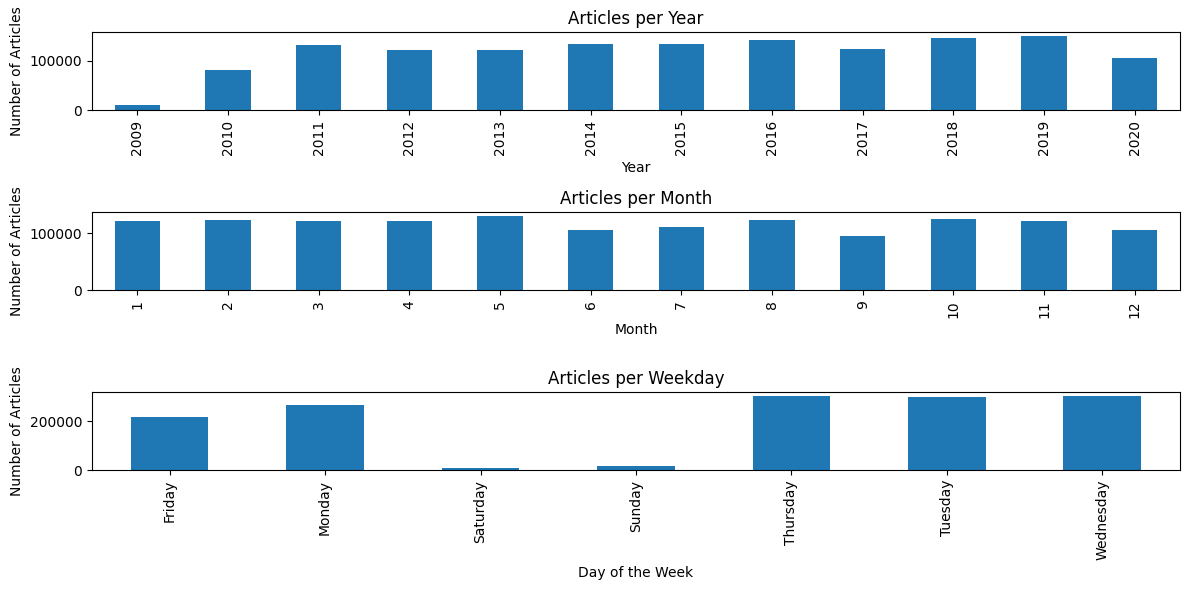

In [26]:

# Plotting the trends
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
articles_per_year.plot(kind='bar', title='Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 2)
articles_per_month.plot(kind='bar', title='Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 3)
articles_per_weekday_name.plot(kind='bar', title='Articles per Weekday')
# articles_per_weekday.plot(kind='bar', title='Articles per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

In [27]:
# Articles per Month of Each Year
articles_per_month_year = df.groupby(['publication_year', 'publication_month']).size().unstack(fill_value=0)
articles_per_month_year


publication_month,1,2,3,4,5,6,7,8,9,10,11,12
publication_year,,,,,,,,,,,,
2009,0,1,0,3,12,40,75,3633,1023,1330,2262,3110
2010,3807,4130,4739,4007,5098,4707,4958,7481,8098,8581,11516,14197
2011,14307,8250,8901,10583,12275,11563,13573,12728,8313,10714,10848,9267
2012,10529,11708,10441,10674,11162,9249,10763,10316,8094,11486,10116,8111
2013,10838,10945,10343,11294,10657,9270,11076,10152,8548,10686,9490,8230
2014,9394,10428,9674,10752,11843,10286,12159,11525,10529,14539,12226,11504
2015,12530,12350,11588,11611,11734,12109,11677,10829,8558,11098,10738,10473
2016,11437,12860,11778,11900,11627,11568,11231,13789,10622,12299,13215,9566
2017,10660,10896,10585,9217,11441,12816,9304,10445,7642,11213,12017,8220


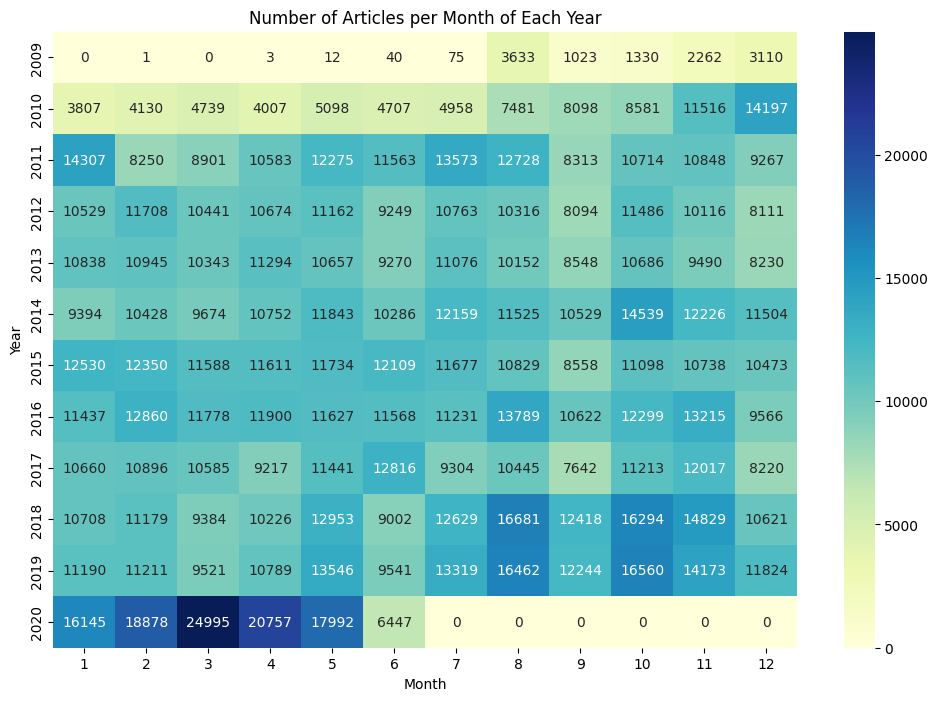

In [28]:
# Plotting the number of articles per month of each year
plt.figure(figsize=(12, 8))
sns.heatmap(articles_per_month_year, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Articles per Month of Each Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



<Figure size 1200x800 with 0 Axes>

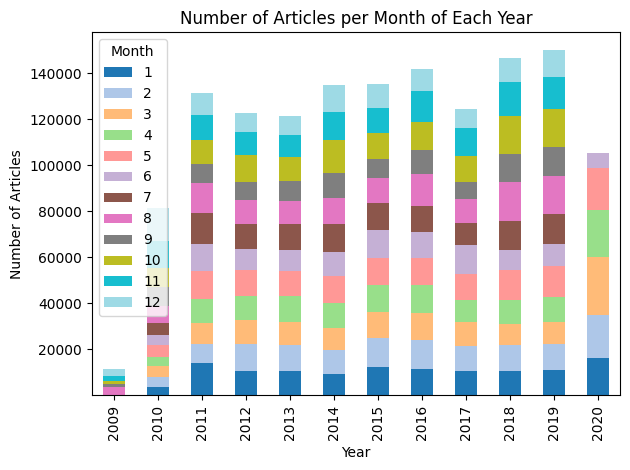

In [29]:
# Alternative plot for the number of articles per month of each year
plt.figure(figsize=(12, 8))
articles_per_month_year.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Number of Articles per Month of Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

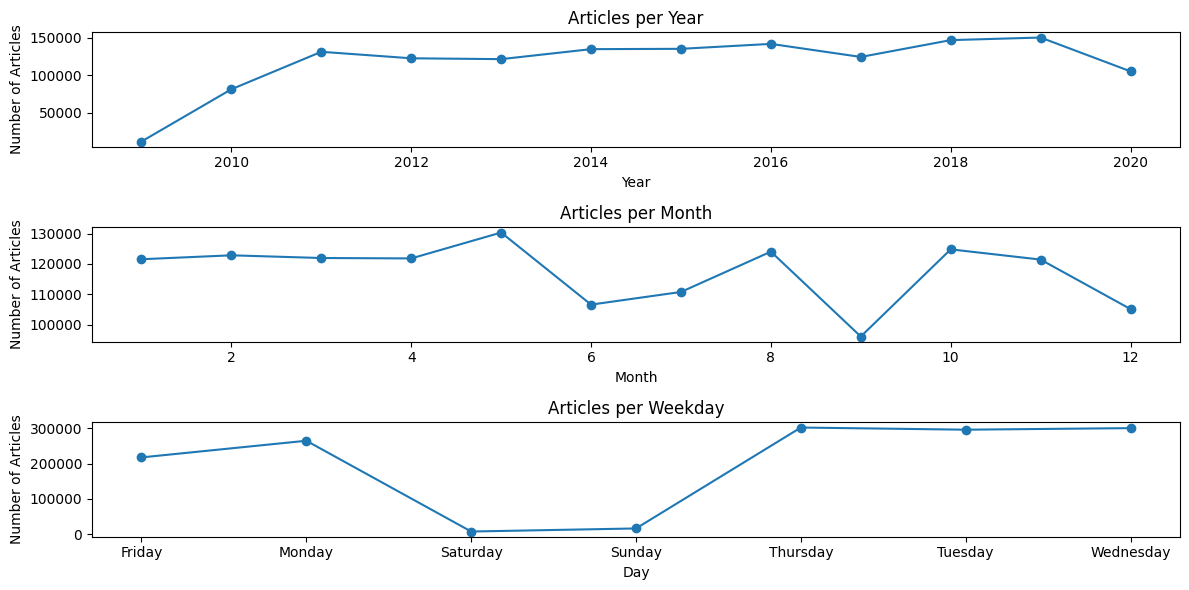

In [30]:
# Another alternative figure for the above
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
articles_per_year.plot(kind='line', marker='o', title='Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 2)
articles_per_month.plot(kind='line', marker='o', title='Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 3)
articles_per_weekday_name.plot(kind='line', marker='o', title='Articles per Weekday')
# articles_per_weekday.plot(kind='line', marker='o', title='Articles per Weekday')
plt.xlabel('Day')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()


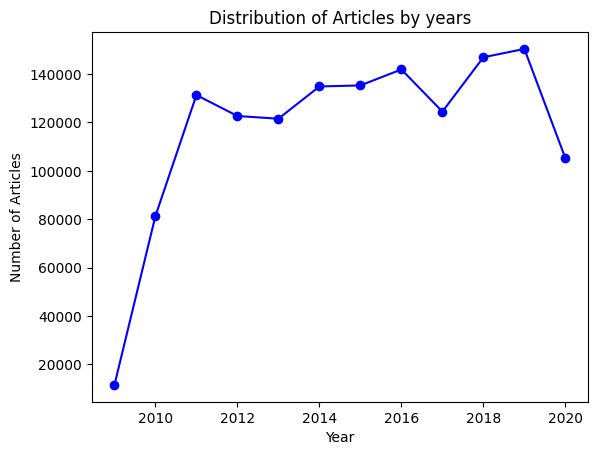

In [31]:
# Distribution of articles by years
articles_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Distribution of Articles by years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

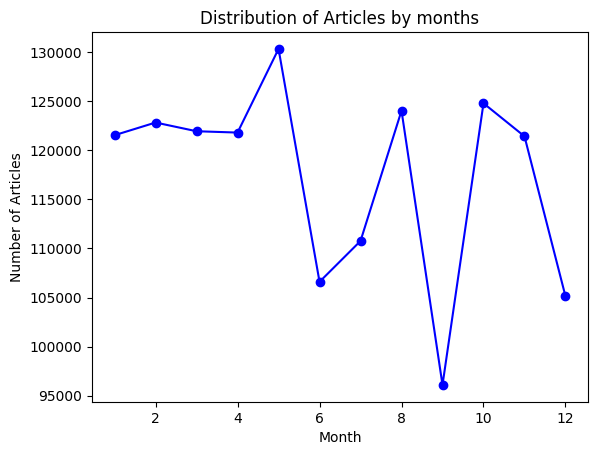

In [32]:
# Distribution of articles by months
articles_per_month.plot(kind='line', marker='o', color='blue')
plt.title('Distribution of Articles by months')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

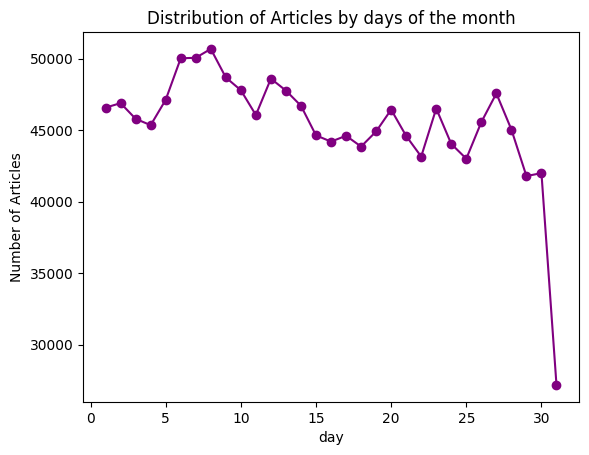

In [33]:
# Distribution of articles by days of the month
articles_per_day.plot(kind='line', marker='o', color='purple')
plt.title('Distribution of Articles by days of the month')
plt.xlabel('day')
plt.ylabel('Number of Articles')
plt.show()

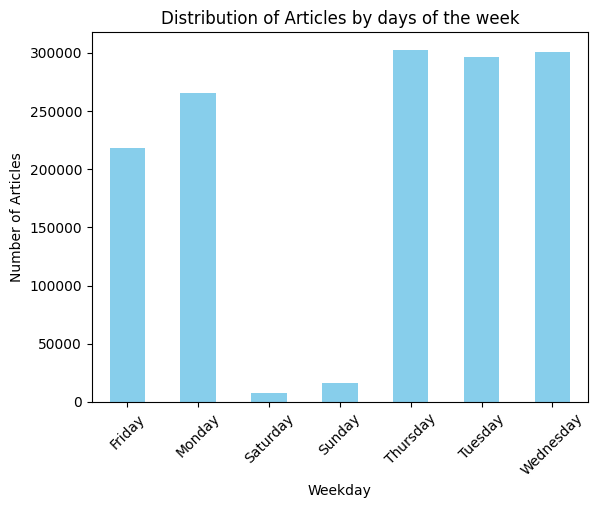

In [34]:
# Distribution of articles by days of the week
articles_per_weekday_name.plot(kind='bar', color='skyblue')
# articles_per_weekday.plot(kind='bar', color='skyblue')
plt.title('Distribution of Articles by days of the week')
plt.xlabel('Weekday')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

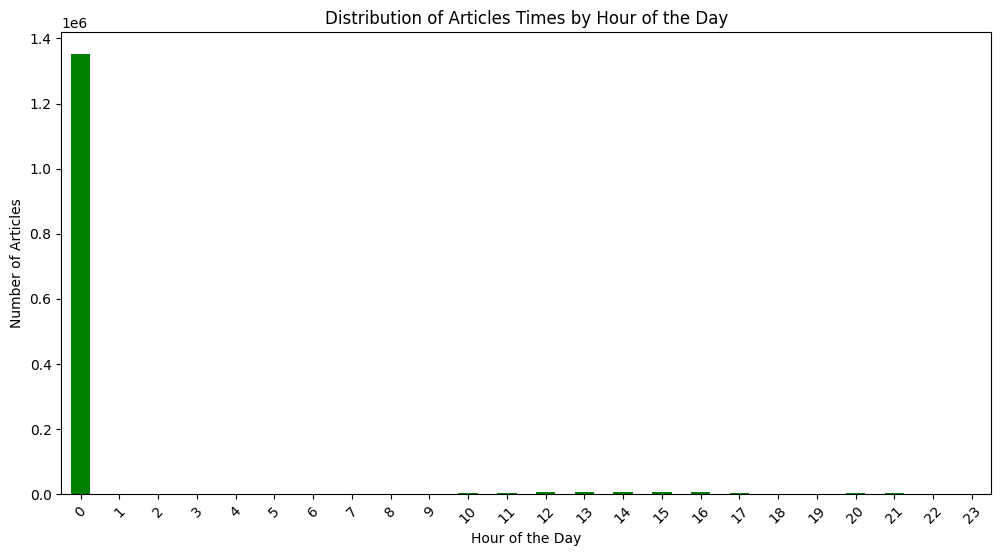

In [35]:
# Distribution of articles by hour of the Day
plt.figure(figsize=(12, 6))
articles_per_hour.plot(kind='bar', color='green')
plt.title('Distribution of Articles Times by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [36]:
articles_per_hour

publication_hour
0     1351472
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64

In [37]:
# Extract year and month from the date
df['year_month'] = df['date'].dt.to_period('M')

# Group by year and month to get the count of articles published monthly each year
publication_counts = df.groupby('year_month').size()
publication_counts

C:\Users\Darkles\AppData\Local\Temp\ipykernel_15280\3945858874.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


year_month
2009-02        1
2009-04        3
2009-05       12
2009-06       40
2009-07       75
           ...  
2020-02    18878
2020-03    24995
2020-04    20757
2020-05    17992
2020-06     6447
Freq: M, Length: 136, dtype: int64

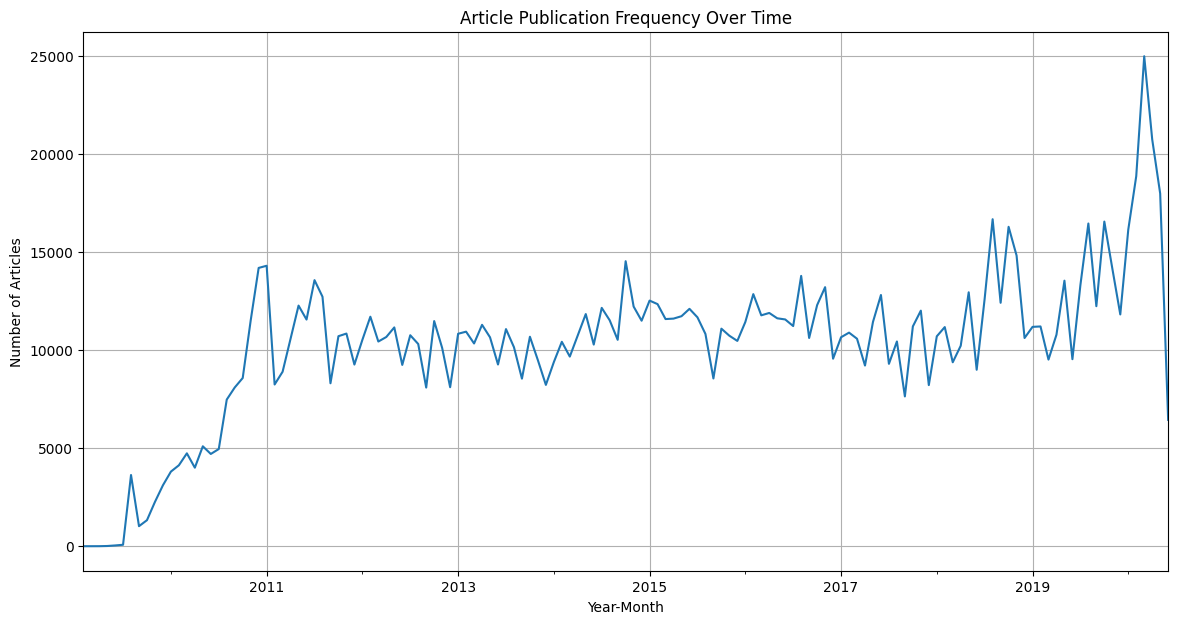

In [38]:
# Plot the publication frequency over time
plt.figure(figsize=(14, 7))
publication_counts.plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [39]:
# Identify spikes in article publications
spikes = publication_counts[publication_counts > publication_counts.mean() + 2 * publication_counts.std()]
spikes

year_month
2020-02    18878
2020-03    24995
2020-04    20757
Freq: M, dtype: int64